## EDA - Exploratory Data Analysis

The goal of Exploratory Data Analysis (EDA) is to understand the data, identify patterns, and prepare it for modeling. In this EDA, we will explore the relationship between gas prices, crude oil prices, and weather data to identify trends or correlations that could be useful for our prediction model.

### Step-by-Step Plan for EDA

1. Load Data from CSV Files

    - Load the gas prices, crude oil prices, and weather data CSV files into pandas DataFrames.

2. Understand the Data Structure

    - Examine the first few rows of each DataFrame to understand the structure and get a sense of the data.
    - Check for missing values and data types to ensure everything is correctly formatted.

3. Clean and Preprocess the Data

    - Handle missing values by imputing, removing, or otherwise managing the missing data.
    - Convert date columns to proper datetime formats for easier manipulation and analysis.
    - Normalize or standardize columns if necessary, especially for modeling purposes.

4. Visualize the Data

    - Use various plots such as line plots, histograms, box plots, etc., to visualize trends and distributions in the data.
    - Plot correlations between different datasets to identify potential relationships and dependencies.

5. Feature Engineering

    - Create new features that might be useful for our model, such as moving averages of prices, lagged values, or weather conditions.

6. Correlation Analysis

    - Analyze correlations between gas prices, crude oil prices, and weather data to understand how they interact and influence each other.
    - Use scatter plots, heatmaps, or pair plots to visualize these correlations and identify any significant relationships.

By following this step-by-step plan, we can gain valuable insights into the data and uncover patterns that will help us build an accurate prediction model.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_theme(style="whitegrid")
%matplotlib inline

# Load CSV files into DataFrames
gas_prices_df = pd.read_csv('../data/fuel_prices_ontario.csv', parse_dates=['Date'])
crude_oil_prices_df = pd.read_csv('../data/crude_oil_prices_2022_2024.csv', parse_dates=['Date'])
weather_data_df = pd.read_csv('../data/weather_data_2022_2024.csv', parse_dates=['Date'])

# Filter gas prices data to only include dates between Jan 1, 2021, and July 31, 2024
start_date = '2021-01-01'
end_date = '2024-07-31'
gas_prices_df = gas_prices_df[(gas_prices_df['Date'] >= start_date) & (gas_prices_df['Date'] <= end_date)]

# Check if 'Date' is in the columns or index
if 'Date' not in gas_prices_df.columns:
    gas_prices_df.reset_index(inplace=True)  # Reset index if 'Date' is the index

if 'Date' not in crude_oil_prices_df.columns:
    crude_oil_prices_df.reset_index(inplace=True)  # Reset index if 'Date' is the index

# Convert 'Date' columns to datetime
gas_prices_df['Date'] = pd.to_datetime(gas_prices_df['Date'])
crude_oil_prices_df['Date'] = pd.to_datetime(crude_oil_prices_df['Date'])

# Focus only on 'Regular Unleaded Gasoline'
gas_prices_df = gas_prices_df[gas_prices_df['Fuel Type'] == 'Regular Unleaded Gasoline']

# Print head for the first few rows of each DataFrame
print("Gas Prices DataFrame:")
print(gas_prices_df.head())
print("\nCrude Oil Prices DataFrame:")
print(crude_oil_prices_df.head())
print("\nWeather Data DataFrame:")
print(weather_data_df.head())

Gas Prices DataFrame:
           Date  Ottawa  Toronto West/Ouest  Toronto East/Est  Windsor  \
1618 2021-01-04   105.6               106.4             105.9    105.4   
1619 2021-01-11   110.7               111.8             111.5    109.9   
1620 2021-01-18   110.5               111.5             110.8    111.0   
1621 2021-01-25   110.8               111.9             111.7    110.2   
1622 2021-02-01   112.2               113.2             112.8    108.5   

      London  Peterborough  St. Catharine's  Sudbury  Sault Saint Marie  \
1618   105.6         100.8             98.7    109.0              110.2   
1619   110.4         104.0            107.2    110.9              115.7   
1620   110.3         105.7            108.1    115.6              114.5   
1621   112.8         107.4            109.5    120.0              113.8   
1622   113.4         110.7            110.3    120.5              121.6   

      Thunder Bay  North Bay  Timmins  Kenora  Parry Sound  \
1618        121.8   

In [65]:
# Check for missing values
print("\nMissing values in Gas Prices DataFrame:")
print(gas_prices_df.info())

print("\nMissing values in Crude Oil Prices DataFrame:")
print(crude_oil_prices_df.info())

print("\nMissing values in Weather Data DataFrame:")
print(weather_data_df.info())

# Drop or impute missing values as needed
# For simplicity, I will drop rows with missing data
gas_prices_df = gas_prices_df.dropna()
crude_oil_prices_df = crude_oil_prices_df.dropna()
weather_data_df = weather_data_df.dropna()

# Select the 'Toronto West/Ouest' gas prices for analysis
gas_prices_toronto = gas_prices_df['Toronto West/Ouest'].dropna()

# Calculate first difference for gas prices
gas_prices_toronto_diff = gas_prices_toronto.diff().dropna()

# Calculate first difference for crude oil prices
crude_oil_close_diff = crude_oil_prices_df['Close'].diff().dropna()


Missing values in Gas Prices DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 1618 to 1804
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           187 non-null    datetime64[ns]
 1   Ottawa                                         187 non-null    float64       
 2   Toronto West/Ouest                             187 non-null    float64       
 3   Toronto East/Est                               187 non-null    float64       
 4   Windsor                                        187 non-null    float64       
 5   London                                         187 non-null    float64       
 6   Peterborough                                   187 non-null    float64       
 7   St. Catharine's                                187 non-null    float64       
 8   Sudbury             

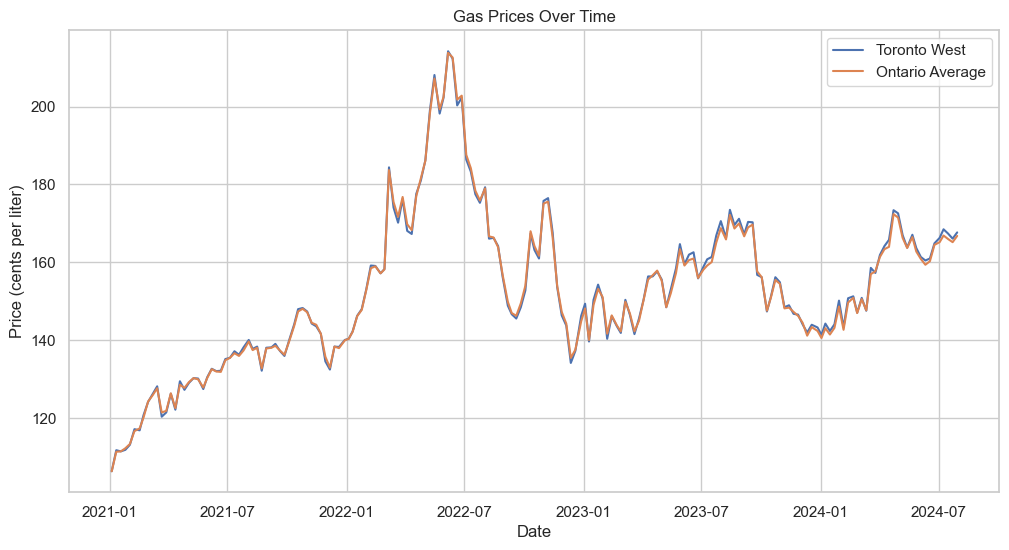

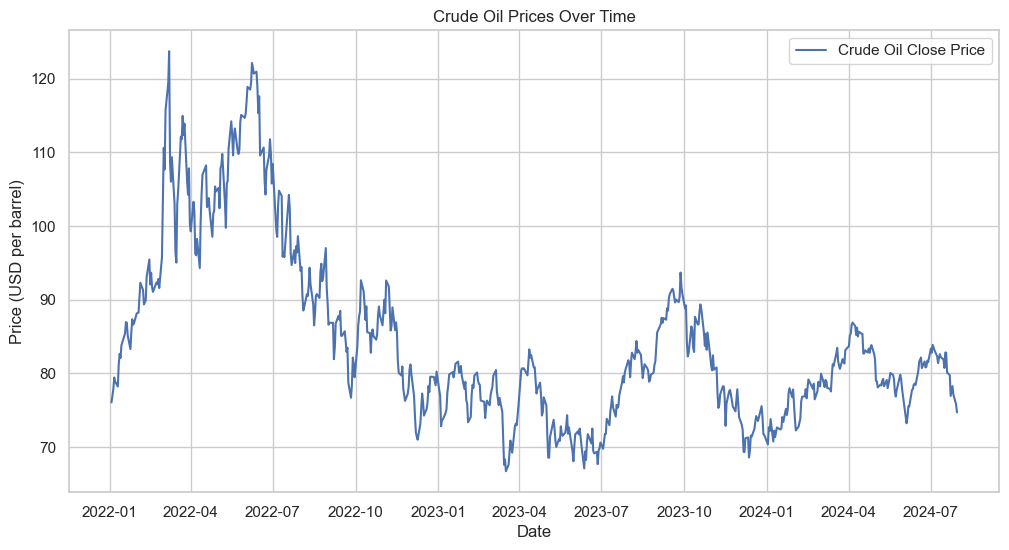

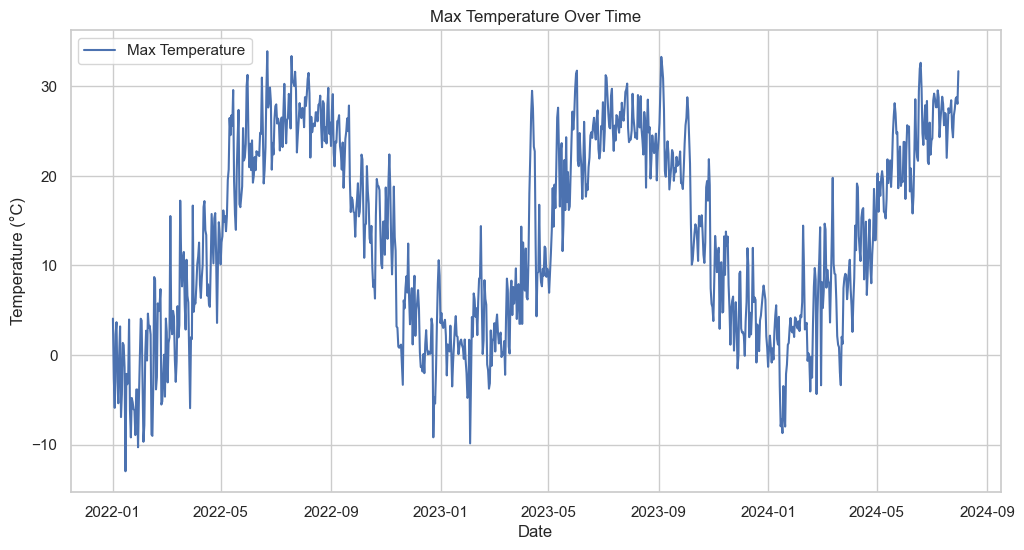

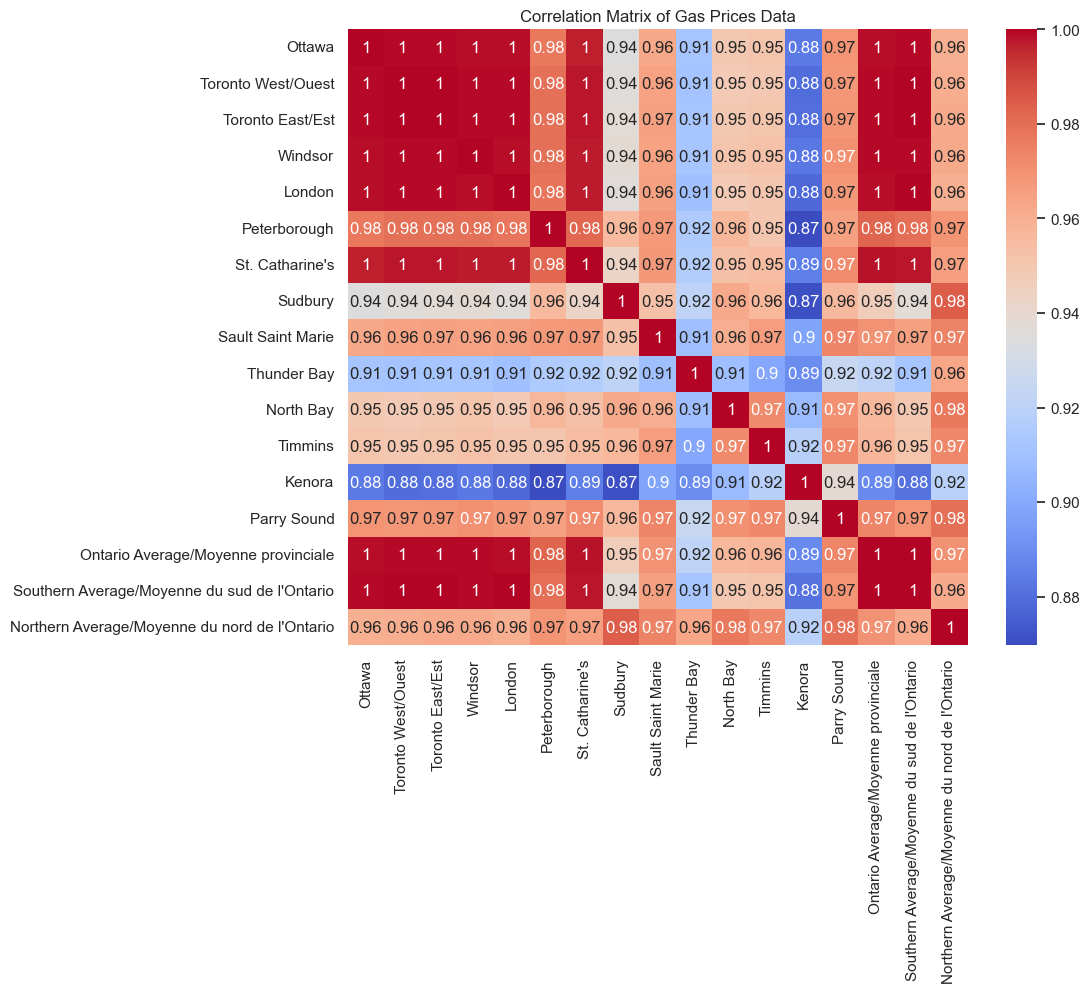

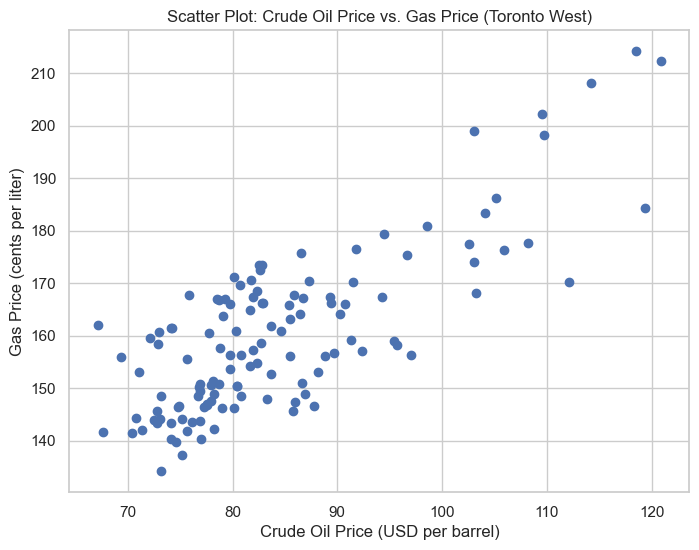

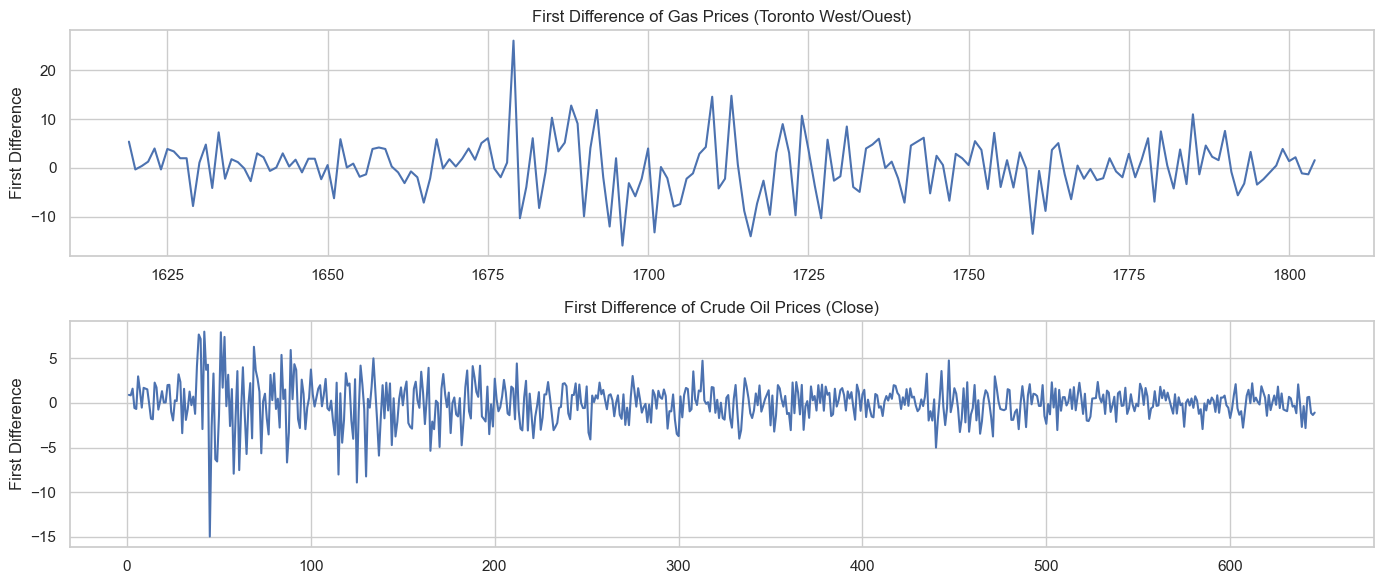

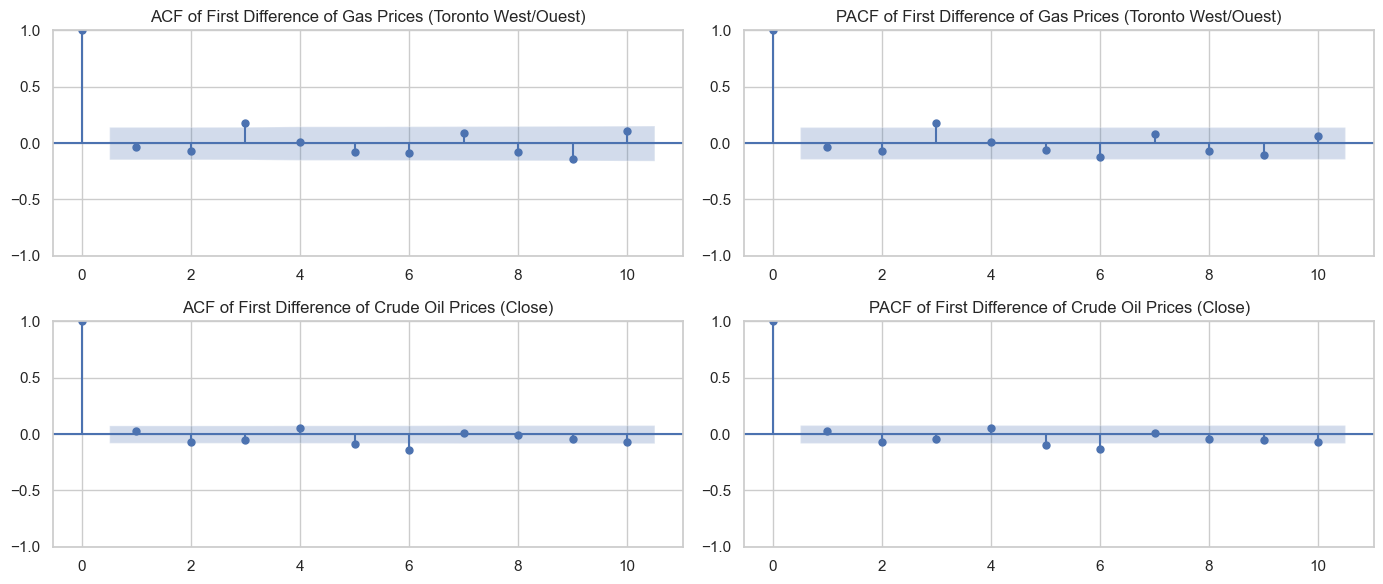

In [69]:
# Plotting trends in gas prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=gas_prices_df, x='Date', y='Toronto West/Ouest', label='Toronto West')
sns.lineplot(data=gas_prices_df, x='Date', y='Ontario Average/Moyenne provinciale', label='Ontario Average')
plt.title('Gas Prices Over Time')
plt.ylabel('Price (cents per liter)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plotting crude oil prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=crude_oil_prices_df, x='Date', y='Close', label='Crude Oil Close Price')
plt.title('Crude Oil Prices Over Time')
plt.ylabel('Price (USD per barrel)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Visualizing weather data (e.g., temperature variations over time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data_df, x='Date', y='temperature.max', label='Max Temperature')
plt.title('Max Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Plotting correlations between different datasets
plt.figure(figsize=(10, 8))
sns.heatmap(gas_prices_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Gas Prices Data')
plt.show()

# Merge the gas prices and crude oil prices DataFrames on 'Date' to align them
combined_df = pd.merge(gas_prices_df[['Date', 'Toronto West/Ouest']], crude_oil_prices_df[['Date', 'Close']], on='Date', how='inner')
combined_df.set_index('Date', inplace=True)

# Scatter plot between crude oil prices and gas prices
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Close'], combined_df['Toronto West/Ouest'])
plt.title('Scatter Plot: Crude Oil Price vs. Gas Price (Toronto West)')
plt.xlabel('Crude Oil Price (USD per barrel)')
plt.ylabel('Gas Price (cents per liter)')

# Plotting the first difference for gas prices
plt.figure(figsize=(14, 6))

plt.subplot(211)
plt.plot(gas_prices_toronto_diff)
plt.title('First Difference of Gas Prices (Toronto West/Ouest)')
plt.ylabel('First Difference')

# Plotting the first difference for crude oil closing prices
plt.subplot(212)
plt.plot(crude_oil_close_diff)
plt.title('First Difference of Crude Oil Prices (Close)')
plt.ylabel('First Difference')

plt.tight_layout()
plt.show()

# Plot ACF and PACF for first differenced gas prices
plt.figure(figsize=(14, 6))

# ACF plot for gas prices first difference
plt.subplot(221)
plot_acf(gas_prices_toronto_diff, lags=10, ax=plt.gca())
plt.title('ACF of First Difference of Gas Prices (Toronto West/Ouest)')

# PACF plot for gas prices first difference
plt.subplot(222)
plot_pacf(gas_prices_toronto_diff, lags=10, ax=plt.gca())
plt.title('PACF of First Difference of Gas Prices (Toronto West/Ouest)')

# ACF plot for crude oil closing prices first difference
plt.subplot(223)
plot_acf(crude_oil_close_diff, lags=10, ax=plt.gca())
plt.title('ACF of First Difference of Crude Oil Prices (Close)')

# PACF plot for crude oil closing prices first difference
plt.subplot(224)
plot_pacf(crude_oil_close_diff, lags=10, ax=plt.gca())
plt.title('PACF of First Difference of Crude Oil Prices (Close)')

plt.tight_layout()
plt.show()

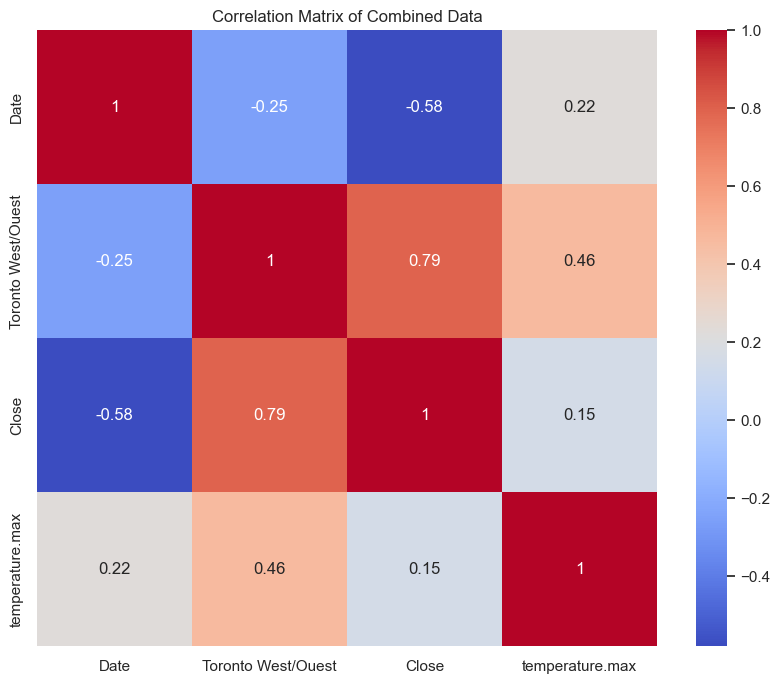

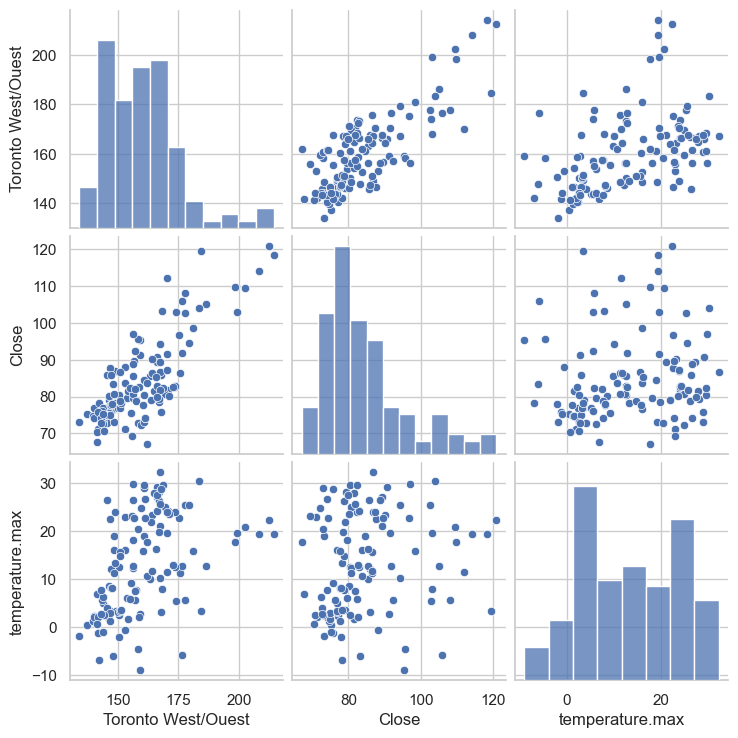

In [70]:
# Analyzing correlations between gas prices, crude oil prices, and weather data
combined_data = pd.merge(pd.merge(gas_prices_df[['Date', 'Toronto West/Ouest']], crude_oil_prices_df[['Date', 'Close']], on='Date'), weather_data_df[['Date', 'temperature.max']], on='Date')

# Correlation matrix for combined data
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Combined Data')
plt.show()

# Pair plots to visualize potential correlations
sns.pairplot(combined_data)
plt.show()